In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial.transform import Rotation as R
import sympy as sp



# WEEK 1

is info anoute overal robots
and focuse in on robort arms and there joints (use if need to look up description that is not meath)

In [3]:
#Check if R is orthogonal
def is_orthogonal(R):
    print("R matrix:")
    print(R)
    print("\nR.T @ R (should be identity matrix):")
    print(R.T @ R)
    print("\nDeterminant of R (should be 1):")
    print(np.linalg.det(R))
    print("\nVerification: R.T @ R == I?")
    print(np.allclose(R.T @ R, np.eye(3)))
    return np.allclose(R.T @ R, np.eye(3))

# WEEK 2

1 joiunt on dof (deagre of fredom)


## Rotation basiks
Funktion:

creat_rotation_matrix_from_xyz_cords -findes R01 given x0,y0,z1,x1,y1,z1 descripte in the saem frame if o1 and o0 is the same 

Rx,Ry,Rz -basick rotation matrixc around x y z axes whit angle theta 

### functions

In [4]:
def creat_rotation_matrix_from_xyz_cords(fram1,fram2, symbolic=False):
    if symbolic:
        r = sp.Matrix.zeros(3, 3)
        for i in range(3):
            r[0, i] = fram1[0].dot(fram2[i])
            r[1, i] = fram1[1].dot(fram2[i])
            r[2, i] = fram1[2].dot(fram2[i])
    else:
        r = np.zeros((3,3))
        for i in range(3):
            r[0][i] = np.dot(fram1[0],fram2[i])
            r[1][i] = np.dot(fram1[1],fram2[i])
            r[2][i] = np.dot(fram1[2],fram2[i])
    return r

#basick rotation matrixc around x y z axes whit angle theta
def Rx(theta, symbolic=False): 
    if symbolic:
        r = sp.Matrix([[1, 0, 0],
                      [0, sp.cos(theta), -sp.sin(theta)],
                      [0, sp.sin(theta), sp.cos(theta)]])
    else:
        r = np.array([[1, 0, 0],
                     [0, math.cos(theta), -math.sin(theta)],
                     [0, math.sin(theta), math.cos(theta)]])
    return r

def Ry(theta, symbolic=False): 
    if symbolic:
        r = sp.Matrix([[sp.cos(theta), 0, sp.sin(theta)],
                      [0, 1, 0],
                      [-sp.sin(theta), 0, sp.cos(theta)]])
    else:
        r = np.array([[math.cos(theta), 0, math.sin(theta)],
                     [0, 1, 0],
                     [-math.sin(theta), 0, math.cos(theta)]])
    return r

def Rz(theta, symbolic=False): 
    if symbolic:
        r = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0],
                      [sp.sin(theta), sp.cos(theta), 0],
                      [0, 0, 1]])
    else:
        r = np.array([[math.cos(theta), -math.sin(theta), 0],
                     [math.sin(theta), math.cos(theta), 0],
                     [0, 0, 1]])
    return r

#P0=R01*P1
#P1=R01^T*P0
def finde_p0_from_p1_and_r01(P1, R01, symbolic=False):
    if symbolic:
        P0 = R01 * P1
    else:
        P0 = R01 @ P1
    return P0

def finde_p1_from_p0_and_r01(P0, R01, symbolic=False):
    if symbolic:
        P1 = R01.T * P0
    else:
        P1 = R01.T @ P0
    return P1

#p0a -> p0b 
#p0b = r01 @ p0a
def rotate_p0a_to_p0b(p0a, r01, symbolic=False): #this function rotate p0a (a point in frame0) to p0b (the same point in frame1) so it move compared to world frame
    if symbolic:
        p0b = r01 * p0a
    else:
        p0b = r01 @ p0a
    return p0b

def rotation_matrix_to_euler_angles_zyz(R, symbolic=False):
    """
    Extract Euler angles (ZYZ convention) from rotation matrix R
    Returns: (phi, theta, psi) in radians
    where phi is first rotation around Z, theta around Y, psi around Z again
    """
    if symbolic:
        theta = sp.acos(R[2, 2])
        phi = sp.atan2(R[1, 2], R[0, 2])
        psi = sp.atan2(R[2, 1], -R[2, 0])
    else:
        # Check if R[2,2] is close to ±1 (gimbal lock case)
        if abs(R[2, 2]) != 1:
            theta = math.acos(R[2, 2])
            phi = math.atan2(R[1, 2], R[0, 2])
            psi = math.atan2(R[2, 1], -R[2, 0])
        else:
            # Gimbal lock case
            psi = 0  # Set psi to 0 arbitrarily
            if R[2, 2] == 1:
                theta = 0
                phi = math.atan2(R[1, 0], R[0, 0])
            else:
                theta = math.pi
                phi = math.atan2(-R[1, 0], R[0, 0])
    
    return phi, theta, psi

### Exampel use numeric

In [5]:
#findes R01 if o1 and o0 is the same
x0=[1,0,0]
y0=[0,1,0]
z0=[0,0,1]
x1=[0.5,0.5,0]
y1=[-0.5,0.5,0]
z1=[0,0,1]

# Normalize all vectors
x0=np.array(x0)/np.linalg.norm(x0)
y0=np.array(y0)/np.linalg.norm(y0)
z0=np.array(z0)/np.linalg.norm(z0)
x1=np.array(x1)/np.linalg.norm(x1)
y1=np.array(y1)/np.linalg.norm(y1)
z1=np.array(z1)/np.linalg.norm(z1)

frame1=[x0,y0,z0]
frame2=[x1,y1,z1]

r=creat_rotation_matrix_from_xyz_cords(frame1,frame2)
print(r)



[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [7]:
#test rotation matrix
theta_x=math.pi/4   
theta_y=math.pi/4
theta_z=math.pi/4
R_test=Rz(theta_z)@Ry(theta_y)@Rx(theta_x) #this Rotate
print(R_test)



[[ 0.5        -0.14644661  0.85355339]
 [ 0.5         0.85355339 -0.14644661]
 [-0.70710678  0.5         0.5       ]]


In [8]:
#test finde p0 from p1 and r01
P1=np.array([1,1,1])
P0=finde_p0_from_p1_and_r01(P1,r)
print(P0)
#test finde p1 from p0 and r01
P1_new=finde_p1_from_p0_and_r01(P0,r)
print(P1_new)

[0.         1.41421356 1.        ]
[1. 1. 1.]


In [9]:
# Test the function with existing rotation matrix R_test
phi, theta, psi = rotation_matrix_to_euler_angles_zyz(R_test)
print(f"Euler angles (ZYZ): phi={phi:.4f}, theta={theta:.4f}, psi={psi:.4f}")
print(f"In degrees: phi={math.degrees(phi):.2f}°, theta={math.degrees(theta):.2f}°, psi={math.degrees(psi):.2f}°")

this_R = R.from_matrix(R_test)
out=this_R.as_euler('zyz', degrees=False) # Use degrees=True for degrees
print(out)

# Verify by reconstructing the rotation matrix from both sets of angles
print("Original R_test:")
print(R_test)
print("\n" + "="*50)

Euler angles (ZYZ): phi=-0.1699, theta=1.0472, psi=0.6155
In degrees: phi=-9.74°, theta=60.00°, psi=35.26°
[ 0.61547971  1.04719755 -0.16991845]
Original R_test:
[[ 0.5        -0.14644661  0.85355339]
 [ 0.5         0.85355339 -0.14644661]
 [-0.70710678  0.5         0.5       ]]



In [10]:
# From custom function (extrinsic ZYZ)
phi_custom, theta_custom, psi_custom = phi, theta, psi
R_reconstructed_custom = Rz(phi_custom) @ Ry(theta_custom) @ Rz(psi_custom)
print("\nReconstructed from custom function angles:")
print(R_reconstructed_custom)
print("Match with R_test?", np.allclose(R_test, R_reconstructed_custom))

# From SciPy (intrinsic zyz)
scipy_angles = out  # [0.6155, 1.0472, -1.7407]
R_reconstructed_scipy = R.from_euler('zyz', scipy_angles, degrees=False).as_matrix()
print("\nReconstructed from SciPy angles:")
print(R_reconstructed_scipy)
print("Match with R_test?", np.allclose(R_test, R_reconstructed_scipy))


Reconstructed from custom function angles:
[[ 0.5        -0.14644661  0.85355339]
 [ 0.5         0.85355339 -0.14644661]
 [-0.70710678  0.5         0.5       ]]
Match with R_test? True

Reconstructed from SciPy angles:
[[ 0.5        -0.14644661  0.85355339]
 [ 0.5         0.85355339 -0.14644661]
 [-0.70710678  0.5         0.5       ]]
Match with R_test? True


### Exampel use symbolic

In [21]:
# Define symbolic variables for frame 0
x0_x, x0_y, x0_z = sp.symbols('x0x x0y x0z', real=True)
y0_x, y0_y, y0_z = sp.symbols('y0x y0y y0z', real=True)
z0_x, z0_y, z0_z = sp.symbols('z0x z0y z0z', real=True)

# Define symbolic variables for frame 1
x1_x, x1_y, x1_z = sp.symbols('x1x x1y x1z', real=True)
y1_x, y1_y, y1_z = sp.symbols('y1x y1y y1z', real=True)
z1_x, z1_y, z1_z = sp.symbols('z1x z1y z1z', real=True)

# Create symbolic vectors for frame 0
x0_sym = sp.Matrix([x0_x, x0_y, x0_z])
y0_sym = sp.Matrix([y0_x, y0_y, y0_z])
z0_sym = sp.Matrix([z0_x, z0_y, z0_z])

# Create symbolic vectors for frame 1
x1_sym = sp.Matrix([x1_x, x1_y, x1_z])
y1_sym = sp.Matrix([y1_x, y1_y, y1_z])
z1_sym = sp.Matrix([z1_x, z1_y, z1_z])

# Test 1: creat_rotation_matrix_from_xyz_cords with symbolic=True
print("=" * 60)
print("Test 1: Create rotation matrix from xyz coordinates (symbolic)")
print("=" * 60)
frame1_sym = [x0_sym, y0_sym, z0_sym]
frame2_sym = [x1_sym, y1_sym, z1_sym]
r_sym = creat_rotation_matrix_from_xyz_cords(frame1_sym, frame2_sym, symbolic=True)
print("Symbolic R01:")
sp.pprint(r_sym, use_unicode=True, wrap_line=False)

# Test 2: Basic rotation matrices Rx, Ry, Rz with symbolic=True
print("\n" + "=" * 60)
print("Test 2: Basic rotation matrices (symbolic)")
print("=" * 60)
theta_x, theta_y, theta_z = sp.symbols('thetaX thetaY thetaZ', real=True)

print("\nRx(theta_x):")
Rx_sym = Rx(theta_x, symbolic=True)
sp.pprint(Rx_sym, use_unicode=True)

print("\nRy(theta_y):")
Ry_sym = Ry(theta_y, symbolic=True)
sp.pprint(Ry_sym, use_unicode=True)

print("\nRz(theta_z):")
Rz_sym = Rz(theta_z, symbolic=True)
sp.pprint(Rz_sym, use_unicode=True)

# Combined rotation: Rz @ Ry @ Rx
print("\nCombined rotation R_test = Rz(theta_z) * Ry(theta_y) * Rx(theta_x):")
R_test_sym = Rz_sym * Ry_sym * Rx_sym
sp.pprint(R_test_sym, use_unicode=True,wrap_line=False)




# Test 3: Find P0 from P1 and R01, and vice versa
print("\n" + "=" * 60)
print("Test 3: Point transformations (symbolic)")
print("=" * 60)
p1_x, p1_y, p1_z = sp.symbols('p1x p1y p1z', real=True)
P1_sym = sp.Matrix([p1_x, p1_y, p1_z])

print("\nOriginal P1:")
sp.pprint(P1_sym, use_unicode=True,wrap_line=False)

print("\nP0 = R01 * P1:")
P0_sym = finde_p0_from_p1_and_r01(P1_sym, r_sym, symbolic=True)
sp.pprint(P0_sym, use_unicode=True,wrap_line=False)

print("\nP1_reconstructed = R01.T * P0:")
P1_reconstructed = finde_p1_from_p0_and_r01(P0_sym, r_sym, symbolic=True)
sp.pprint(sp.simplify(P1_reconstructed), use_unicode=True,wrap_line=False)



# Test 4: Rotation matrix to Euler angles ZYZ
print("\n" + "=" * 60)
print("Test 4: Extract Euler angles (ZYZ) from rotation matrix (symbolic)")
print("=" * 60)


phi_sym, theta_sym, psi_sym = rotation_matrix_to_euler_angles_zyz(R_test_sym, symbolic=True)
print("\nEuler angles from R_test:")
print(f"phi = {phi_sym}")
print(f"theta = {theta_sym}")
print(f"psi = {psi_sym}")


# Test 5: rotate_p0a_to_p0b
print("\n" + "=" * 60)
print("Test 5: Rotate point in frame 0 (symbolic)")
print("=" * 60)
p0a_x, p0a_y, p0a_z = sp.symbols('p0ax p0ay p0az', real=True)
p0a_sym = sp.Matrix([p0a_x, p0a_y, p0a_z])

print("\nOriginal point p0a:")
sp.pprint(p0a_sym, use_unicode=True,wrap_line=False)

print("\nRotated point p0b = R01 * p0a:")
p0b_sym = rotate_p0a_to_p0b(p0a_sym, r_sym, symbolic=True)
sp.pprint(p0b_sym, use_unicode=True,wrap_line=False)

print("\n" + "=" * 60)
print("All symbolic tests completed!")
print("=" * 60)

Test 1: Create rotation matrix from xyz coordinates (symbolic)
Symbolic R01:
⎡x0x⋅x1x + x0y⋅x1y + x0z⋅x1z  x0x⋅y1x + x0y⋅y1y + x0z⋅y1z  x0x⋅z1x + x0y⋅z1y + x0z⋅z1z⎤
⎢                                                                                     ⎥
⎢x1x⋅y0x + x1y⋅y0y + x1z⋅y0z  y0x⋅y1x + y0y⋅y1y + y0z⋅y1z  y0x⋅z1x + y0y⋅z1y + y0z⋅z1z⎥
⎢                                                                                     ⎥
⎣x1x⋅z0x + x1y⋅z0y + x1z⋅z0z  y1x⋅z0x + y1y⋅z0y + y1z⋅z0z  z0x⋅z1x + z0y⋅z1y + z0z⋅z1z⎦

Test 2: Basic rotation matrices (symbolic)

Rx(theta_x):
⎡1       0            0      ⎤
⎢                            ⎥
⎢0  cos(thetaX)  -sin(thetaX)⎥
⎢                            ⎥
⎣0  sin(thetaX)  cos(thetaX) ⎦

Ry(theta_y):
⎡cos(thetaY)   0  sin(thetaY)⎤
⎢                            ⎥
⎢     0        1       0     ⎥
⎢                            ⎥
⎣-sin(thetaY)  0  cos(thetaY)⎦

Rz(theta_z):
⎡cos(thetaZ)  -sin(thetaZ)  0⎤
⎢                            ⎥
⎢sin(thetaZ)  cos(thetaZ)

### notes

![week 2 img1.jpg](<attachment:week 2 img1.jpg>)
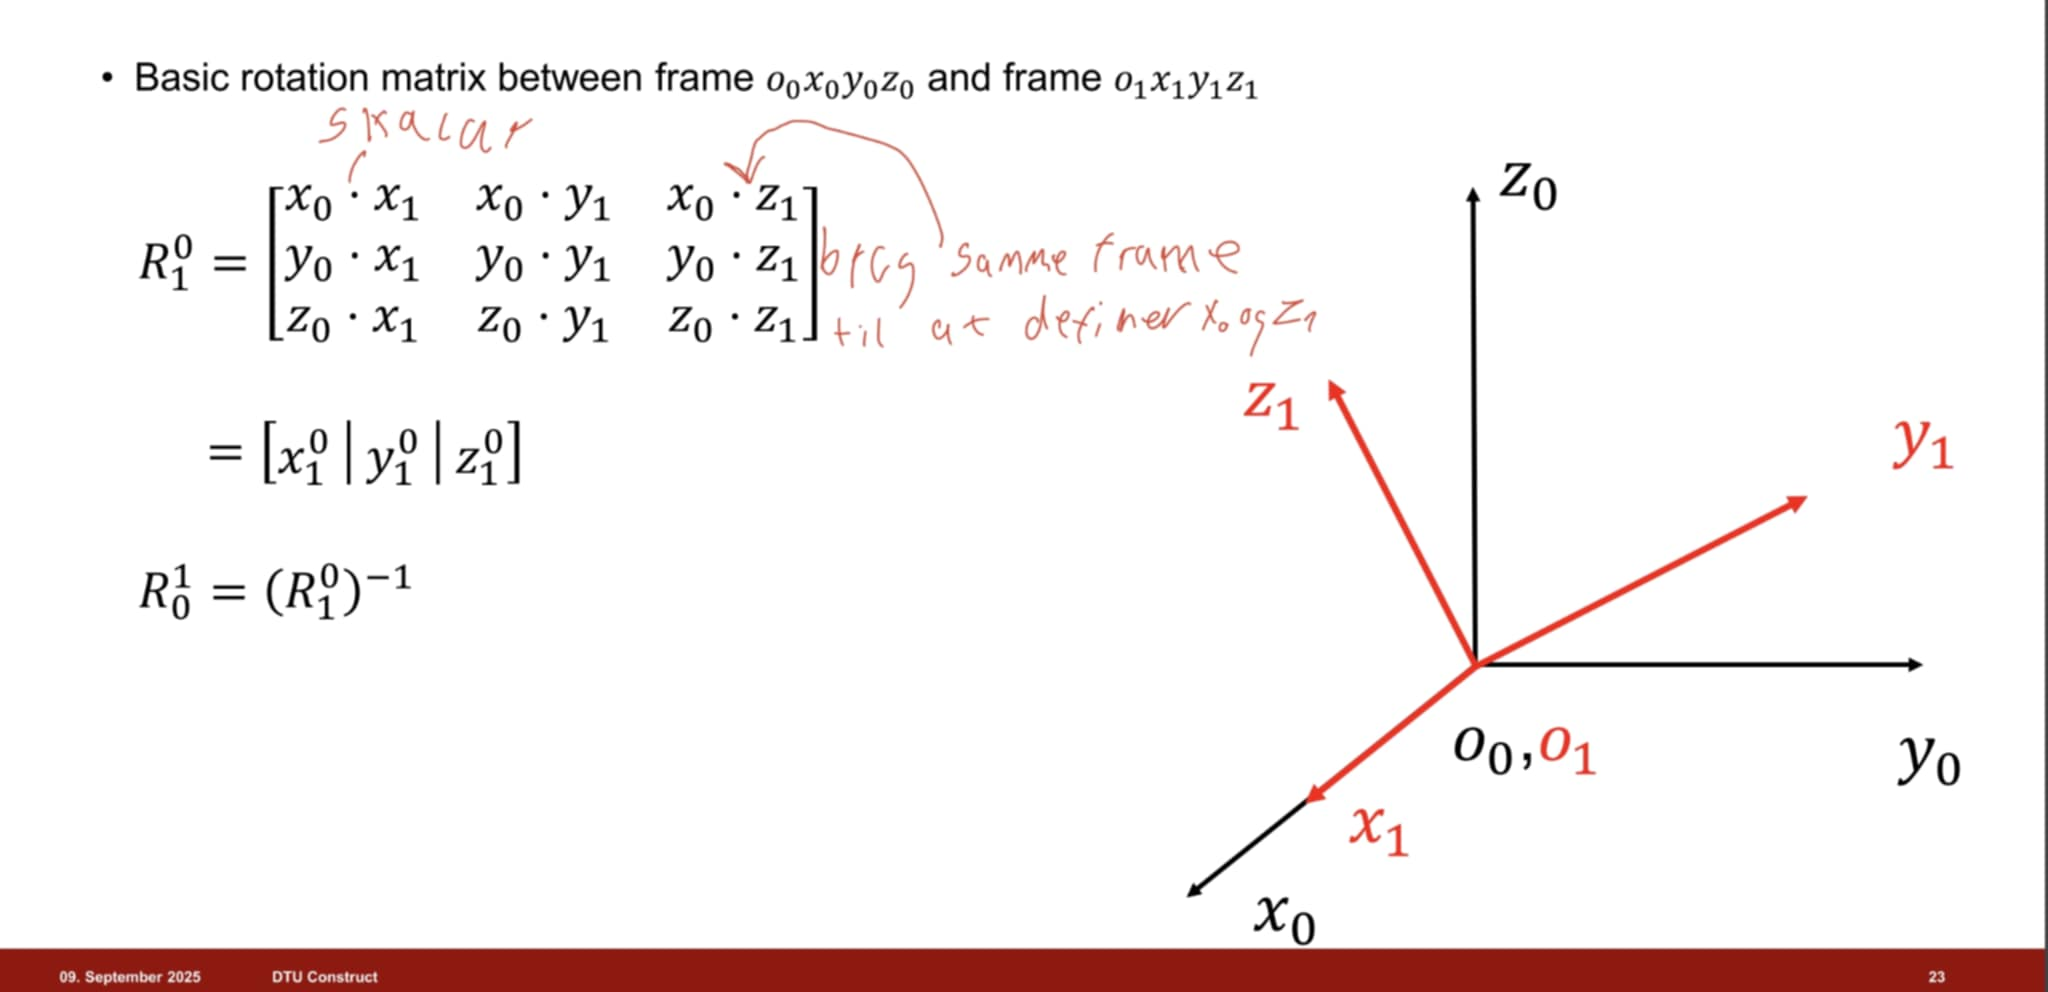

#### Rotation order notes
- `Rx(θx)` rotates around the **x-axis** (roll), `Ry(θy)` around the **y-axis** (pitch), `Rz(θz)` around the **z-axis** (yaw). Angles follow the right-hand rule: positive θ turns counterclockwise when looking along the positive axis toward the origin.
- `R_test = Rz(θz) @ Ry(θy) @ Rx(θx)` applies **`Rx` first, then `Ry`, then `Rz`** to a column vector. Matrix multiplication reads right-to-left for column vectors.
- Changing the order (e.g., `Rx @ Ry @ Rz` vs `Rz @ Ry @ Rx`) changes the final orientation because rotations in 3D do not generally commute.
- fixed axis -> pre
- curent axis -> post

#### Why the difference?

**The two methods give the same angles in different orders:**
- Custom function: `(phi, theta, psi) = (-1.7407, 1.0472, 0.6155)` = `(-99.74°, 60°, 35.26°)`
- SciPy: `[0.6155, 1.0472, -1.7407]` = `(35.26°, 60°, -99.74°)`

**SciPy uses a different convention for ZYZ Euler angles:**
- SciPy returns angles in the order they appear in the intrinsic (body-fixed) rotation sequence
- Your custom function extracts angles assuming an extrinsic (fixed-axis) interpretation

Both are correct, but they represent different conventions. The angles are related but applied in different reference frames (intrinsic vs extrinsic rotations).

## Homogeneous Transformation

In [11]:

# Define symbolic variables for rotation matrix elements
r11, r12, r13 = sp.symbols('r11 r12 r13')
r21, r22, r23 = sp.symbols('r21 r22 r23')
r31, r32, r33 = sp.symbols('r31 r32 r33')

# Create symbolic rotation matrix R01
R01_sym = sp.Matrix([
    [r11, r12, r13],
    [r21, r22, r23],
    [r31, r32, r33]
])

# Define symbolic variables for translation vector
ox, oy, oz = sp.symbols('ox oy oz')

# Create symbolic translation vector o01
o01_sym = sp.Matrix([ox, oy, oz])



def create_homogeneous_transform(R, o, symbolic=False):
    """
    Create a homogeneous transformation matrix H from rotation matrix R and translation vector o
    
    Parameters:
    - R: 3x3 rotation matrix (numpy array or sympy Matrix)
    - o: 3x1 translation vector (numpy array or sympy Matrix)
    - symbolic: if True, returns sympy Matrix; if False, returns numpy array
    
    Returns:
    - H: 4x4 homogeneous transformation matrix
    """
    if symbolic:
        import sympy as sp
        H = sp.Matrix([
            [R[0,0], R[0,1], R[0,2], o[0]],
            [R[1,0], R[1,1], R[1,2], o[1]],
            [R[2,0], R[2,1], R[2,2], o[2]],
            [0,      0,      0,      1]
        ])
    else:
        H = np.zeros((4, 4))
        H[:3, :3] = R
        H[:3, 3] = o.flatten()
        H[3, 3] = 1
    
    return H

# Test with symbolic matrices
H01_sym = create_homogeneous_transform(R01_sym, o01_sym, symbolic=True)
print("Symbolic H01 matrix:")
print(H01_sym)

# Test with numeric matrices
H01_numeric = create_homogeneous_transform(r, np.array([1, 2, 3]), symbolic=False)
print("\nNumeric H01 matrix:")
print(H01_numeric)

Symbolic H01 matrix:
Matrix([[r11, r12, r13, ox], [r21, r22, r23, oy], [r31, r32, r33, oz], [0, 0, 0, 1]])

Numeric H01 matrix:
[[ 0.70710678 -0.70710678  0.          1.        ]
 [ 0.70710678  0.70710678  0.          2.        ]
 [ 0.          0.          1.          3.        ]
 [ 0.          0.          0.          1.        ]]


# WEEk 3

## Debavit Hartenberg Convention (forwerd Kenematics)

![week 3 img1.png](<attachment:week 3 img1.png>)
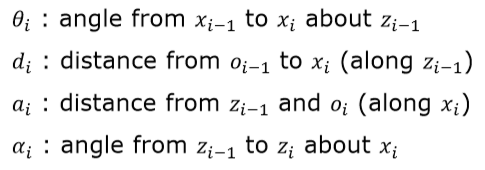

![week 3 img2.png](<attachment:week 3 img2.png>)

DH1: The two axes are perpendicular (90° apart).

DH2: The two axes meet at the same point.

DH1: “The axis 
𝑥
𝑖
x
i ​is perpendicular to the axis 
𝑧
𝑖
−
1
z
i−1
”

➡️ This means:

The 
𝑥
𝑖
x
i
 axis is at a right angle (90°) to the previous 
𝑧
z axis.

They are not tilted toward each other.

Think of one line going up–down and another going left–right — they meet at a right angle.

DH2: “The axis 
𝑥
𝑖
x
i
 intersects the axis 
𝑧
𝑖
−
1
z
i−1
	​
”

➡️ This means:

The 
x
i
 axis and the previous 
z axis cross each other.

They meet at one point (they are not separate or parallel).
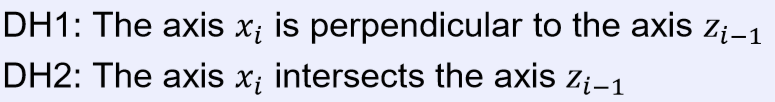

In [31]:
def create_dh_transform(a, alpha, d, theta, symbolic=False):
    """
    Create a Denavit-Hartenberg transformation matrix A_i
    
    Parameters:
    - a: link length (distance along x_i from z_{i-1} to z_i)
    - alpha: link twist (angle around x_i from z_{i-1} to z_i)
    - d: link offset (distance along z_{i-1} from x_{i-1} to x_i)
    - theta: joint angle (angle around z_{i-1} from x_{i-1} to x_i)
    - symbolic: if True, returns sympy Matrix; if False, returns numpy array
    
    Returns:
    - A_i: 4x4 homogeneous transformation matrix from frame {i-1} to frame {i}
    
    The transformation represents:
    1. Rotate theta around z_{i-1}
    2. Translate d along z_{i-1}
    3. Translate a along x_i
    4. Rotate alpha around x_i
    """
    if symbolic:
        A = sp.Matrix([
            [sp.cos(theta), -sp.sin(theta)*sp.cos(alpha),  sp.sin(theta)*sp.sin(alpha), a*sp.cos(theta)],
            [sp.sin(theta),  sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha), a*sp.sin(theta)],
            [0,              sp.sin(alpha),                 sp.cos(alpha),                d],
            [0,              0,                             0,                            1]
        ])
    else:
        A = np.array([
            [math.cos(theta), -math.sin(theta)*math.cos(alpha),  math.sin(theta)*math.sin(alpha), a*math.cos(theta)],
            [math.sin(theta),  math.cos(theta)*math.cos(alpha), -math.cos(theta)*math.sin(alpha), a*math.sin(theta)],
            [0,                math.sin(alpha),                  math.cos(alpha),                 d],
            [0,                0,                                0,                               1]
        ])
    
    return A

# Test with symbolic parameters
a_sym, alpha_sym, d_sym, theta_sym = sp.symbols('a alpha d theta', real=True)
A_sym = create_dh_transform(a_sym, alpha_sym, d_sym, theta_sym, symbolic=True)
print("Symbolic DH transformation matrix A_i:")
sp.pprint(A_sym, use_unicode=True,wrap_line=False)

# Test with numeric parameters (example: a=1, alpha=pi/2, d=0.5, theta=pi/4)
A_numeric = create_dh_transform(1, math.pi/2, 0.5, math.pi/4, symbolic=False)
print("\n\nNumeric DH transformation matrix A_i:")
print(A_numeric)

Symbolic DH transformation matrix A_i:
⎡cos(θ)  -sin(θ)⋅cos(α)  sin(α)⋅sin(θ)   a⋅cos(θ)⎤
⎢                                                ⎥
⎢sin(θ)  cos(α)⋅cos(θ)   -sin(α)⋅cos(θ)  a⋅sin(θ)⎥
⎢                                                ⎥
⎢  0         sin(α)          cos(α)         d    ⎥
⎢                                                ⎥
⎣  0           0               0            1    ⎦


Numeric DH transformation matrix A_i:
[[ 7.07106781e-01 -4.32978028e-17  7.07106781e-01  7.07106781e-01]
 [ 7.07106781e-01  4.32978028e-17 -7.07106781e-01  7.07106781e-01]
 [ 0.00000000e+00  1.00000000e+00  6.12323400e-17  5.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [32]:
def create_dh_transforms_list(dh_params, symbolic=False):
    """
    Create a list of DH transformation matrices from a list of DH parameters
    
    Parameters:
    - dh_params: list of tuples/lists, where each element contains (a, alpha, d, theta)
                 Example: [(a1, alpha1, d1, theta1), (a2, alpha2, d2, theta2), ...]
    - symbolic: if True, returns list of sympy Matrices; if False, returns list of numpy arrays
    
    Returns:
    - A_list: list of 4x4 homogeneous transformation matrices [A01, A12, A23, ...]
    """
    A_list = []
    
    for params in dh_params:
        theta, d, a, alpha = params
        A_i = create_dh_transform(a, alpha, d, theta, symbolic=symbolic)
        A_list.append(A_i)
    
    return A_list

dh1=(1, math.pi/2, 0.5, math.pi/4)
dh2=(0.5, 0, 0.3, math.pi/6)
dh3=(0.3, -math.pi/2, 0, math.pi/3)
# Test with numeric parameters
dh_params_numeric = [dh1,dh2,dh3]

A_list_numeric = create_dh_transforms_list(dh_params_numeric, symbolic=False)
print("Numeric DH transformation matrices:")
for i, A in enumerate(A_list_numeric):
    print(f"\nA{i}{i+1}:")
    print(A)




# Test with symbolic parameters (most of the time only alph and d is need as sybolic)
theta1, theta2, theta4,theta5,theta6 = sp.symbols('t1 t2 t4 t5 t6', real=True)
d3 = sp.symbols('d3', real=True)
#a1, a2, a3 = sp.symbols('a1 a2 a3', real=True)
#alpha1, alpha2, alpha3 = sp.symbols('alpha1 alpha2 alpha3', real=True)

dh1=(theta1, 0  , 0, -math.pi/2)
dh2=(theta2, 0.1, 0, math.pi/2)
dh3=(0     , d3 , 0, 0)
dh4=(theta4, 0  , 0, -math.pi/2)
dh5=(theta5, 0  , 0, math.pi/2)
dh6=(theta6, 0  , 0, 0)

dh_params_symbolic = [dh1,dh2,dh3,dh4,dh5,dh6]

A_list_symbolic = create_dh_transforms_list(dh_params_symbolic, symbolic=True)
print("\n" + "="*60)
print("Symbolic DH transformation matrices:")
for i, A in enumerate(A_list_symbolic):
    print(f"\nA{i}{i+1}:")
    sp.pprint(A, use_unicode=True, wrap_line=False)

Numeric DH transformation matrices:

A01:
[[ 0.54030231 -0.59500984  0.59500984  0.27015115]
 [ 0.84147098  0.38205142 -0.38205142  0.42073549]
 [ 0.          0.70710678  0.70710678  1.57079633]
 [ 0.          0.          0.          1.        ]]

A12:
[[ 0.87758256 -0.4151947   0.23971277  0.26327477]
 [ 0.47942554  0.76000879 -0.43879128  0.14382766]
 [ 0.          0.5         0.8660254   0.        ]
 [ 0.          0.          0.          1.        ]]

A23:
[[ 0.95533649 -0.1477601   0.25592801  0.        ]
 [ 0.29552021  0.47766824 -0.82734567  0.        ]
 [ 0.          0.8660254   0.5        -1.57079633]
 [ 0.          0.          0.          1.        ]]

Symbolic DH transformation matrices:

A01:
⎡cos(t₁)  -6.12323399573677e-17⋅sin(t₁)      -1.0⋅sin(t₁)      0⎤
⎢                                                               ⎥
⎢sin(t₁)  6.12323399573677e-17⋅cos(t₁)       1.0⋅cos(t₁)       0⎥
⎢                                                               ⎥
⎢   0                 -

In [35]:
def compose_transforms(A_list):
    """
    Multiply a list of homogeneous transforms [A01, A12, ...] to get the overall A0n.
    Handles both numpy arrays and sympy Matrices.
    """
    if not A_list:
        raise ValueError("A_list cannot be empty")
    
    first = A_list[0]
    if isinstance(first, sp.Matrix):
        T = sp.eye(4)
        for A_i in A_list:
            T = T * A_i
    else:
        T = np.eye(4)
        for A_i in A_list:
            T = T @ A_i
    return T

# Examples: overall transform from frame 
A02_numeric = compose_transforms(A_list_numeric)
print("A0n_numeric:\n", A02_numeric)

A02_symbolic = compose_transforms(A_list_symbolic)
print("\nA0n_symbolic:")
sp.pprint(sp.simplify(A02_symbolic), use_unicode=True, wrap_line=False)

A0n_numeric:
 [[ 0.06844665  0.575563    0.8148879  -1.09615807]
 [ 0.80657129 -0.51264712  0.2943394   1.16342878]
 [ 0.5871608   0.63711864 -0.49932157  1.19796004]
 [ 0.          0.          0.          1.        ]]

A0n_symbolic:
⎡     -((1.0⋅sin(t₁)⋅sin(t₄) + 5.55111512312578e-17⋅sin(t₂)⋅sin(t₄)⋅cos(t₁) - cos(t₁)⋅cos(t₂)⋅cos(t₄))⋅cos(t₅) + (6.12323399573677e-17⋅(3.74939945665464e-33⋅sin(t₁)⋅cos(t₂) + 1.0⋅sin(t₁) + 6.12323399573677e-17⋅sin(t₂)⋅cos(t₁))⋅cos(t₄) + 6.12323399573677e-17⋅sin(t₁)⋅cos(t₂) - 6.12323399573677e-17⋅sin(t₁) + 1.0⋅sin(t₂)⋅cos(t₁) + 1.53080849893419e-17⋅sin(-t₁ + t₂ + t₄) + 1.53080849893419e-17⋅sin(t₁ - t₂ + t₄) - 1.53080849893419e-17⋅sin(t₁ + t₂ - t₄) + 1.53080849893419e-17⋅sin(t₁ + t₂ + t₄))⋅sin(t₅))⋅cos(t₆) - (-6.12323399573677e-17⋅(1.0⋅sin(t₁)⋅sin(t₄) + 5.55111512312578e-17⋅sin(t₂)⋅sin(t₄)⋅cos(t₁) - cos(t₁)⋅cos(t₂)⋅cos(t₄))⋅sin(t₅) + 1.0⋅(3.74939945665464e-33⋅sin(t₁)⋅cos(t₂) + 1.0⋅sin(t₁) + 6.12323399573677e-17⋅sin(t₂)⋅cos(t₁))⋅cos(t₄) + 6.12323399573677e-17

## Inverse kenematic (come back)

In [41]:
##eksampel week 3 Problem 2

#first i finde the forword kenamatics

theta1, theta2 = sp.symbols('t1 t2', real=True)
dh1=(theta1, 0  , 1,0)
dh2=(theta2, 0, 1, 0)
dh_params_symbolic = [dh1,dh2]

A_list_symbolic = create_dh_transforms_list(dh_params_symbolic, symbolic=True)
print("\n" + "="*60)
print("Symbolic DH transformation matrices:")
for i, A in enumerate(A_list_symbolic):
    print(f"\nA{i}{i+1}:")
    sp.pprint(A, use_unicode=True, wrap_line=False)


#finde combinend
A02_symbolic = compose_transforms(A_list_symbolic)
print("\nA0n_symbolic:")
sp.pprint(sp.simplify(A02_symbolic), use_unicode=True, wrap_line=False)


Symbolic DH transformation matrices:

A01:
⎡cos(t₁)  -sin(t₁)  0  cos(t₁)⎤
⎢                             ⎥
⎢sin(t₁)  cos(t₁)   0  sin(t₁)⎥
⎢                             ⎥
⎢   0        0      1     0   ⎥
⎢                             ⎥
⎣   0        0      0     1   ⎦

A12:
⎡cos(t₂)  -sin(t₂)  0  cos(t₂)⎤
⎢                             ⎥
⎢sin(t₂)  cos(t₂)   0  sin(t₂)⎥
⎢                             ⎥
⎢   0        0      1     0   ⎥
⎢                             ⎥
⎣   0        0      0     1   ⎦

A0n_symbolic:
⎡cos(t₁ + t₂)  -sin(t₁ + t₂)  0  cos(t₁) + cos(t₁ + t₂)⎤
⎢                                                      ⎥
⎢sin(t₁ + t₂)  cos(t₁ + t₂)   0  sin(t₁) + sin(t₁ + t₂)⎥
⎢                                                      ⎥
⎢     0              0        1            0           ⎥
⎢                                                      ⎥
⎣     0              0        0            1           ⎦


In [45]:
def inverse_kinematics_2dof_analytical(r14, r24, a1=1, a2=1, symbolic=False):
    """
    Solve IK for 2-DOF planar manipulator using analytical approach with law of cosines.
    
    Parameters:
    - r14, r24: end-effector position (tip position from base)
    - a1, a2: link lengths
    - symbolic: if True, uses SymPy; if False, uses numeric math
    
    Returns:
    - dict with 'elbow_down' and 'elbow_up' solutions, each containing (theta1, theta2)
    """
    
    if symbolic:
        r_squared = r14**2 + r24**2
        
        # Common term
        numerator = r_squared / 2 - a1**2 - a2**2
        denominator = 2 * a1 * a2
        cos_term = numerator / denominator
        
        # Elbow down (theta2 > 0)
        c2_down = cos_term
        s2_down = sp.sqrt(1 - c2_down**2)
        theta2_down = sp.atan2(s2_down, c2_down)
        theta1_down = sp.atan2(r24, r14) - sp.atan2(a1 + a2*c2_down, a2*s2_down)
        
        # Elbow up (theta2 < 0)
        s2_up = -sp.sqrt(1 - c2_down**2)
        theta2_up = sp.atan2(s2_up, c2_down)
        theta1_up = sp.atan2(r24, r14) - sp.atan2(a1 + a2*c2_down, a2*s2_up)
        
        solutions = {
            'elbow_down': (theta1_down, theta2_down),
            'elbow_up': (theta1_up, theta2_up)
        }
    else:
        r_squared = r14**2 + r24**2
        
        # Check if reachable
        if r_squared > (a1 + a2)**2 or r_squared < (a1 - a2)**2:
            return None  # Out of reach
        
        # Common term: cos(π - θ₂) = (r² - a₁² - a₂²) / (2·a₁·a₂)
        numerator = r_squared / 2 - a1**2 - a2**2
        denominator = 2 * a1 * a2
        cos_term = numerator / denominator
        
        # Clamp to [-1, 1] to avoid numerical issues with acos
        cos_term = np.clip(cos_term, -1, 1)
        
        # Elbow down (θ₂ > 0)
        c2_down = cos_term
        s2_down = math.sqrt(1 - c2_down**2)
        theta2_down = math.atan2(s2_down, c2_down)
        theta1_down = math.atan2(r24, r14) - math.atan2(a1 + a2*c2_down, a2*s2_down)
        
        # Elbow up (θ₂ < 0)
        s2_up = -math.sqrt(1 - c2_down**2)
        theta2_up = math.atan2(s2_up, c2_down)
        theta1_up = math.atan2(r24, r14) - math.atan2(a1 + a2*c2_down, a2*s2_up)
        
        solutions = {
            'elbow_down': (theta1_down, theta2_down),
            'elbow_up': (theta1_up, theta2_up)
        }
    
    return solutions

# Test numeric
print("=" * 60)
print("Numeric IK Test:")
print("=" * 60)
r14_val, r24_val = 1.5, 0.8
solutions_numeric = inverse_kinematics_2dof_analytical(r14_val, r24_val, a1=1, a2=1, symbolic=False)

for config, (t1, t2) in solutions_numeric.items():
    print(f"\n{config.upper()}:")
    print(f"  θ₁ = {t1:.4f} rad ({math.degrees(t1):.2f}°)")
    print(f"  θ₂ = {t2:.4f} rad ({math.degrees(t2):.2f}°)")
    
    # Verify by forward kinematics
    x_check = 1*math.cos(t1) + 1*math.cos(t1 + t2)
    y_check = 1*math.sin(t1) + 1*math.sin(t1 + t2)
    print(f"  Verification: x={x_check:.4f}, y={y_check:.4f} (target: {r14_val}, {r24_val})")

# Test symbolic
print("\n" + "=" * 60)
print("Symbolic IK Test:")
print("=" * 60)
r14_sym, r24_sym = sp.symbols('r14 r24', real=True)
solutions_symbolic = inverse_kinematics_2dof_analytical(r14_sym, r24_sym, a1=1, a2=1, symbolic=True)

for config, (t1, t2) in solutions_symbolic.items():
    print(f"\n{config.upper()}:")
    print(f"  θ₁ =")
    sp.pprint(t1, use_unicode=True, wrap_line=False)
    print(f"  θ₂ =")
    sp.pprint(t2, use_unicode=True, wrap_line=False)

Numeric IK Test:

ELBOW_DOWN:
  θ₁ = -0.1548 rad (-8.87°)
  θ₂ = 1.8520 rad (106.11°)
  Verification: x=0.8620, y=0.8378 (target: 1.5, 0.8)

ELBOW_UP:
  θ₁ = -2.0068 rad (-114.98°)
  θ₂ = -1.8520 rad (-106.11°)
  Verification: x=-1.1760, y=-0.2491 (target: 1.5, 0.8)

Symbolic IK Test:

ELBOW_DOWN:
  θ₁ =
                       ⎛                   ________________________⎞
                       ⎜                  ╱                      2 ⎟
                       ⎜   2      2      ╱      ⎛   2      2    ⎞  ⎟
                       ⎜r₁₄    r₂₄      ╱       ⎜r₁₄    r₂₄     ⎟  ⎟
atan2(r₂₄, r₁₄) - atan2⎜──── + ────,   ╱    1 - ⎜──── + ──── - 1⎟  ⎟
                       ⎝ 4      4    ╲╱         ⎝ 4      4      ⎠  ⎠
  θ₂ =
     ⎛      ________________________                 ⎞
     ⎜     ╱                      2                  ⎟
     ⎜    ╱      ⎛   2      2    ⎞       2      2    ⎟
     ⎜   ╱       ⎜r₁₄    r₂₄     ⎟    r₁₄    r₂₄     ⎟
atan2⎜  ╱    1 - ⎜──── + ──── - 1⎟  , ──── + ──── - 1

# WEEk 4

## anguler velocity

### anguler velocity as vector

- k = axis of rotation (unit vector)
- w = thtea_direvetive K
- v = w X r (Linear velocity of a point at distance r) 

In [78]:
#skew symmetic matrix 
def skew_symmetric(w, symbolic=False):
    """
    Create the 3x3 skew-symmetric matrix [w]_x for w = [wx, wy, wz].
    """
    if symbolic:
        if not isinstance(w, sp.Matrix):
            w = sp.Matrix(w)
        if w.shape == (3,):
            wx, wy, wz = w
        elif w.shape == (3, 1):
            wx, wy, wz = w[0], w[1], w[2]
        else:
            raise ValueError("w must be a 3-element vector")
        return sp.Matrix([[0, -wz,  wy],
                          [wz,  0, -wx],
                          [-wy, wx,  0]])
    else:
        w = np.asarray(w).reshape(-1)
        if w.size != 3:
            raise ValueError("w must be a 3-element vector")
        wx, wy, wz = w
        return np.array([[0.0, -wz,  wy],
                         [wz,  0.0, -wx],
                         [-wy,  wx,  0.0]])
    
def theta_d_and_k_from_omega(w, symbolic=False):
    if symbolic:
        thate_d=sp.sqrt(w[0]**2+w[1]**2+w[2]**2)
        k=1/thate_d*w
        return thate_d,k
    else:
        thate_d=math.sqrt(w[0]**2+w[1]**2+w[2]**2)
        k=np.dot(1/thate_d  ,w)
        return thate_d,k
 

def rotation_matrix_time_derivative(k, Rk, theta_dot, symbolic=False):
    """
    Compute d/dt R(k, theta) using the identity R' = [theta_dot * k]_x * R(k, theta).
    k must be a 3-element (unit) axis vector.
    """
    if symbolic:
        w = theta_dot * sp.Matrix(k)
        w_skew = skew_symmetric(w, symbolic=True)

        return sp.simplify(w_skew * Rk)
    else:
        k_vec = np.asarray(k).reshape(3)
        w = theta_dot * k_vec
        w_skew = skew_symmetric(w, symbolic=False)
        return w_skew @ Rk
 


# Symbolic example
wx, wy, wz = sp.symbols('wx wy wz', real=True)
w_sym = sp.Matrix([wx, wy, wz])
theta_dot_sym, k_sym = theta_d_and_k_from_omega(w_sym, symbolic=True)
print("Symbolic theta_dot:")
sp.pprint(theta_dot_sym, use_unicode=True)
print("Symbolic k (unit axis):")
sp.pprint(k_sym, use_unicode=True)

w_num = [0.0, 0.0, 2.0]
theta_dot_num, k_num = theta_d_and_k_from_omega(w_num)
print("\nNumeric (via sympy) theta_dot:", float(theta_dot_num))
print("Numeric (via sympy) k:", [float(val) for val in k_num])


# Example usage:
dR_dt_num = rotation_matrix_time_derivative([0, 0, 1], r, theta_dot=0.5, symbolic=False)
print(dR_dt_num)
dR_dt_sym = rotation_matrix_time_derivative(k_sym, r_sym , theta_dot_sym, symbolic=True)
print("\nSymbolic dR/dt:")
sp.pprint(dR_dt_sym)

Symbolic theta_dot:
   _________________
  ╱   2     2     2 
╲╱  wx  + wy  + wz  
Symbolic k (unit axis):
⎡         wx         ⎤
⎢────────────────────⎥
⎢   _________________⎥
⎢  ╱   2     2     2 ⎥
⎢╲╱  wx  + wy  + wz  ⎥
⎢                    ⎥
⎢         wy         ⎥
⎢────────────────────⎥
⎢   _________________⎥
⎢  ╱   2     2     2 ⎥
⎢╲╱  wx  + wy  + wz  ⎥
⎢                    ⎥
⎢         wz         ⎥
⎢────────────────────⎥
⎢   _________________⎥
⎢  ╱   2     2     2 ⎥
⎣╲╱  wx  + wy  + wz  ⎦

Numeric (via sympy) theta_dot: 2.0
Numeric (via sympy) k: [0.0, 0.0, 1.0]
[[-0.35355339 -0.35355339  0.        ]
 [ 0.35355339 -0.35355339  0.        ]
 [ 0.          0.          0.        ]]

Symbolic dR/dt:
⎡wy⋅(x1x⋅z0x + x1y⋅z0y + x1z⋅z0z) - wz⋅(x1x⋅y0x + x1y⋅y0y + x1z⋅y0z)   wy⋅(y1x
⎢                                                                             
⎢-wx⋅(x1x⋅z0x + x1y⋅z0y + x1z⋅z0z) + wz⋅(x0x⋅x1x + x0y⋅x1y + x0z⋅x1z)  -wx⋅(y1
⎢                                                      

## Linear Velocities

In [ ]:
def linear_velocity_from_omega_and_r(w, r, symbolic=False):
    """
    Compute linear velocity v = w × r using the skew-symmetric matrix of w.
    """
    w_skew = skew_symmetric(w, symbolic=symbolic)
    if symbolic:
        r_vec = r if isinstance(r, sp.Matrix) else sp.Matrix(r)
        if r_vec.shape not in [(3, 1), (3,)]:
            raise ValueError("r must be a 3-element    vector")
        return w_skew * r_vec
    else:
        r_vec = np.asarray(r).reshape(-1)
        if r_vec.size != 3:
            raise ValueError("r must be a 3-element vector")
        return w_skew @ r_vec


## Jacobian

In [82]:
def compute_jacobian(A_list, joint_types, symbolic=False):
    """
    Compute the Jacobian matrix for a robot manipulator given DH transformations.
    
    Parameters:
    - A_list: list of 4x4 transformation matrices [A01, A12, A23, ...]
    - joint_types: list of strings 'p' (prismatic) or 'r' (revolute) for each joint
    - symbolic: if True, uses sympy; if False, uses numpy
    
    Returns:
    - J: 6xn Jacobian matrix where n is the number of joints
         First 3 rows are linear velocity (Jv)
         Last 3 rows are angular velocity (Jω)
    
    The Jacobian relates joint velocities to end-effector velocities:
    v = J * q_dot
    where v = [linear_velocity; angular_velocity] and q_dot = joint velocities
    """
    n = len(A_list)
    
    if len(joint_types) != n:
        raise ValueError("Length of joint_types must match length of A_list")
    
    # Initialize Jacobian
    if symbolic:
        J = sp.Matrix.zeros(6, n)
        T = sp.eye(4)
    else:
        J = np.zeros((6, n))
        T = np.eye(4)
    
    # Compute cumulative transforms T0i for each joint
    T_list = [sp.eye(4) if symbolic else np.eye(4)]  # T00 = I
    
    for i in range(n):
        if symbolic:
            T = T * A_list[i]
            T_list.append(T.copy())
        else:
            T = T @ A_list[i]
            T_list.append(T.copy())
    
    # End-effector position
    if symbolic:
        o_n = T_list[-1][:3, 3]
    else:
        o_n = T_list[-1][:3, 3]
    
    # Compute each column of Jacobian
    for i in range(n):
        T0i_minus1 = T_list[i]  # Transform to frame i-1
        
        # Extract z-axis and origin of frame i-1
        if symbolic:
            z_i_minus1 = T0i_minus1[:3, 2]  # z-axis of frame i-1
            o_i_minus1 = T0i_minus1[:3, 3]  # origin of frame i-1
        else:
            z_i_minus1 = T0i_minus1[:3, 2]
            o_i_minus1 = T0i_minus1[:3, 3]
        
        if joint_types[i].lower() == 'r':  # Revolute joint
            # Linear velocity: Jvi = zi-1 × (on - oi-1)
            if symbolic:
                diff = o_n - o_i_minus1
                # Cross product using skew symmetric matrix
                Jv_i = sp.Matrix([
                    z_i_minus1[1]*diff[2] - z_i_minus1[2]*diff[1],
                    z_i_minus1[2]*diff[0] - z_i_minus1[0]*diff[2],
                    z_i_minus1[0]*diff[1] - z_i_minus1[1]*diff[0]
                ])
                Jw_i = z_i_minus1  # Angular velocity: zi-1
            else:
                diff = o_n - o_i_minus1
                Jv_i = np.cross(z_i_minus1, diff)
                Jw_i = z_i_minus1
                
        elif joint_types[i].lower() == 'p':  # Prismatic joint
            # Linear velocity: Jvi = zi-1
            # Angular velocity: Jωi = 0
            if symbolic:
                Jv_i = z_i_minus1
                Jw_i = sp.Matrix([0, 0, 0])
            else:
                Jv_i = z_i_minus1
                Jw_i = np.zeros(3)
        else:
            raise ValueError(f"Invalid joint type '{joint_types[i]}'. Use 'r' or 'p'.")
        
        # Assign to Jacobian
        J[:3, i] = Jv_i
        J[3:, i] = Jw_i
    
    return J


# Test with numeric example (3 revolute joints)
print("=" * 60)
print("Numeric Jacobian Test (3R manipulator):")
print("=" * 60)
joint_types_numeric = ['r', 'r', 'r']
J_numeric = compute_jacobian(A_list_numeric, joint_types_numeric, symbolic=False)
print("\nJacobian (numeric):")
print(J_numeric)
print(f"\nShape: {J_numeric.shape}")

# Test with symbolic example (2R manipulator from previous cells)
print("\n" + "=" * 60)
print("Symbolic Jacobian Test (2R planar manipulator):")
print("=" * 60)
joint_types_symbolic_2r = ['r', 'r']
J_symbolic_2r = compute_jacobian(A_list_symbolic, joint_types_symbolic_2r, symbolic=True)
print("\nJacobian (symbolic):")
sp.pprint(sp.simplify(J_symbolic_2r), use_unicode=True, wrap_line=False)

# Test with mixed joints (example: R-R-P-R-R-R from cell 29)
print("\n" + "=" * 60)
print("Symbolic Jacobian Test (RRPRRR manipulator):")
print("=" * 60)
# Recreate the symbolic A_list from cell 29
theta1_j, theta2_j, theta4_j, theta5_j, theta6_j = sp.symbols('t1 t2 t4 t5 t6', real=True)
d3_j = sp.symbols('d3', real=True)

dh_params_rrprrr = [
    (theta1_j, 0, 0, -math.pi/2),
    (theta2_j, 0.1, 0, math.pi/2),
    (0, d3_j, 0, 0),
    (theta4_j, 0, 0, -math.pi/2),
    (theta5_j, 0, 0, math.pi/2),
    (theta6_j, 0, 0, 0)
]

A_list_rrprrr = create_dh_transforms_list(dh_params_rrprrr, symbolic=True)
joint_types_rrprrr = ['r', 'r', 'p', 'r', 'r', 'r']
J_symbolic_rrprrr = compute_jacobian(A_list_rrprrr, joint_types_rrprrr, symbolic=True)
print("\nJacobian (symbolic RRPRRR):")
print("(Showing first 3 columns due to size)")
sp.pprint(sp.simplify(J_symbolic_rrprrr), use_unicode=True, wrap_line=False)

Numeric Jacobian Test (3R manipulator):

Jacobian (numeric):
[[-1.16342878e+00 -3.82720828e-01  2.77555756e-17]
 [-1.09615807e+00 -7.44285257e-01 -5.55111512e-17]
 [ 0.00000000e+00 -8.00905690e-02 -1.11022302e-16]
 [ 0.00000000e+00  5.95009840e-01  9.05896128e-01]
 [ 0.00000000e+00 -3.82051424e-01 -2.96795733e-01]
 [ 1.00000000e+00  7.07106781e-01  3.02100145e-01]]

Shape: (6, 3)

Symbolic Jacobian Test (2R planar manipulator):

Jacobian (symbolic):
⎡-sin(t₁) - sin(t₁ + t₂)  -sin(t₁ + t₂)⎤
⎢                                      ⎥
⎢cos(t₁) + cos(t₁ + t₂)   cos(t₁ + t₂) ⎥
⎢                                      ⎥
⎢           0                   0      ⎥
⎢                                      ⎥
⎢           0                   0      ⎥
⎢                                      ⎥
⎢           0                   0      ⎥
⎢                                      ⎥
⎣           1                   1      ⎦

Symbolic Jacobian Test (RRPRRR manipulator):

Jacobian (symbolic RRPRRR):
(Showing first 3 col